# CECS 453 - Machine Learning Semester Project
### Using a convolutional neural network to train a cat and dog model

In [ ]:
# Import statements

!pip install keras-metrics
!pip install scikit-learn

import time
import datetime
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import classification_report
import keras
import keras_metrics as km
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
# Configurations
TRAIN_DIRECTORY = "./training_set/training_set/"
TEST_DIRECTORY = "./test_set/test_set/"
IMG_WIDTH = 224
IMG_HEIGHT = 224
CAT_ID = 0
DOG_ID = 1

# precision = km.binary_precision(label=0)
# recall = km.binary_recall(label=0)

## Preprocess and load data
### Images are all resized and remove alpha channel

In [ ]:
def load_data():
  x_train = []
  y_train = []
  x_test =  []
  y_test =  []

  # Load training data
  for cat_file in os.listdir(TRAIN_DIRECTORY+"cats"):
    file, ext = os.path.splitext(cat_file)
    if ext != '.jpg':
      continue
    cat_image = cv2.imread(TRAIN_DIRECTORY+"cats/"+cat_file, cv2.IMREAD_COLOR)
    cat_image = cv2.resize(cat_image, (IMG_WIDTH, IMG_HEIGHT))
    x_train.append(cat_image)
    y_train.append(CAT_ID)
  for dog_file in os.listdir(TRAIN_DIRECTORY+"dogs"):
    file, ext = os.path.splitext(dog_file)
    if ext != '.jpg':
      continue
    dog_image = cv2.imread(TRAIN_DIRECTORY+"dogs/"+dog_file, cv2.IMREAD_COLOR)
    dog_image = cv2.resize(dog_image, (IMG_WIDTH, IMG_HEIGHT))
    x_train.append(dog_image)
    y_train.append(DOG_ID)

  # Load testing data
  for cat_file in os.listdir(TEST_DIRECTORY+"cats"):
    file, ext = os.path.splitext(cat_file)
    if ext != '.jpg':
      continue
    cat_image = cv2.imread(TEST_DIRECTORY+"cats/"+cat_file, cv2.IMREAD_COLOR)
    cat_image = cv2.resize(cat_image, (IMG_WIDTH, IMG_HEIGHT))
    x_test.append(cat_image)
    y_test.append(CAT_ID)
  for dog_file in os.listdir(TEST_DIRECTORY+"dogs"):
    file, ext = os.path.splitext(dog_file)
    if ext != '.jpg':
      continue
    dog_image = cv2.imread(TEST_DIRECTORY+"dogs/"+dog_file, cv2.IMREAD_COLOR)
    dog_image = cv2.resize(dog_image, (IMG_WIDTH, IMG_HEIGHT))
    x_test.append(dog_image)
    y_test.append(DOG_ID)

  x_train = np.array(x_train, dtype="float")
  y_train = np.array(y_train)
  x_test = np.array(x_test, dtype="float")
  y_test = np.array(y_test)

  #Normalize RGB values from 0-1
  # x_train /= 255.0
  # x_test /= 255.0

  print("Finished preprocessing and loading data!")

  return (x_train, y_train), (x_test, y_test)

# Main

## Preprocess and load data

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Finished preprocessing and loading data!
x_train shape: (8005, 224, 224, 3)
x_test shape: (2023, 224, 224, 3)
8005 train samples
2023 test samples


## Shuffle training and testing data

In [ ]:
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

## Inspecting the data

Hot one-encoding

In [ ]:
num_classes = 2

y_test_true = y_test.copy()

y_train = np_utils.to_categorical(y_train, num_classes)

y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[1000]
print(y_test_true)

[0 1 1 ... 0 0 0]


In [ ]:
x_train /= 255
x_test /= 255

[0. 1.]


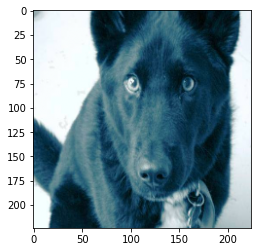

In [ ]:
print(y_train[50])
plt.imshow(x_train[50])

## Creating and training our simple model

In [ ]:
model_1 = Sequential()

model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))


model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Flatten()) 
model_1.add(Dense(32)) 
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(2)) 
model_1.add(Activation('softmax')) 

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23328)             0

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# sets up the model
model_1.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

time_1_start = time.clock()
# gives the model the data that will be fed to it as well as how many times it will be ran through(epochs)
history_1 = model_1.fit(x_train, y_train,
batch_size=batch_size,
epochs=25,
validation_data=(x_test, y_test))
time_1_end = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/25
251/251 [==============================] - 16s 18ms/step - loss: 0.7894 - accuracy: 0.5097 - val_loss: 0.6657 - val_accuracy: 0.6456
Epoch 2/25
251/251 [==============================] - 4s 14ms/step - loss: 0.6520 - accuracy: 0.6364 - val_loss: 0.6690 - val_accuracy: 0.6050
Epoch 3/25
251/251 [==============================] - 4s 14ms/step - loss: 0.6083 - accuracy: 0.6761 - val_loss: 0.5696 - val_accuracy: 0.7153
Epoch 4/25
251/251 [==============================] - 4s 14ms/step - loss: 0.5533 - accuracy: 0.7361 - val_loss: 0.5480 - val_accuracy: 0.7331
Epoch 5/25
251/251 [==============================] - 4s 14ms/step - loss: 0.5183 - accuracy: 0.7545 - val_loss: 0.6076 - val_accuracy: 0.6831
Epoch 6/25
251/251 [==============================] - 4s 14ms/step - loss: 0.4695 - accuracy: 0.7883 - val_loss: 0.5094 - val_accuracy: 0.7622
Epoch 7/25
251/251 [==============================] - 4s 14ms/step - loss: 0.4496 - accuracy: 0.8005 - val_loss: 0.6903 - val_accuracy: 0.708

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


Get the history of the training

In [ ]:
time_1_total = time_1_end - time_1_start
print(time_1_total)
print(datetime.timedelta(seconds=time_1_total))

print(history_1.history.keys())
print(max(history_1.history['accuracy']))
print(max(history_1.history['val_accuracy']))
print(max(history_1.history['loss']))
print(max(history_1.history['val_loss']))


171.664046
0:02:51.664046
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.9161773920059204
0.7716262936592102
0.7089651823043823
1.1012431383132935


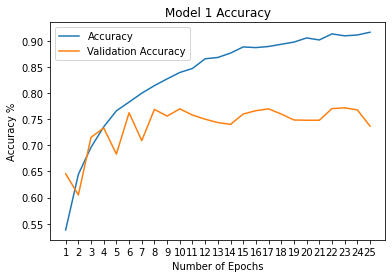

In [ ]:
num_epochs = []
for i in range(len(history_1.history['accuracy'])):
  num_epochs.append(i+1)
plt.xticks(num_epochs)
plt.title("Model 1 Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy %")
plt.plot(num_epochs,history_1.history['accuracy'], label = "Accuracy")
plt.plot(num_epochs, history_1.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()
plt.savefig("Model_1_Accuracy", dpi=300)
plt.show()


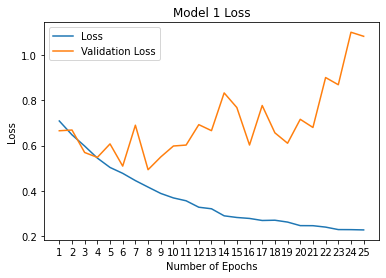

In [ ]:
plt.title("Model 1 Loss")
plt.xticks(num_epochs)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(num_epochs,history_1.history['loss'], label = "Loss")
plt.plot(num_epochs, history_1.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.savefig("Model_1_Loss", dpi=300)
plt.show()

Calculate Accuracy, Precision, and Recall 

In [ ]:
pred_1 = model_1.predict(x_test, batch_size=32)
predict_1 = np.argmax(pred_1, axis=1)
print(predict_1)
print(y_test_true)
report_1 = classification_report(y_test_true, predict_1, target_names=['Cat', 'Dog'])
print(report_1)

[0 1 0 ... 0 1 0]
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

         Cat       0.68      0.91      0.78      1011
         Dog       0.86      0.57      0.68      1012

    accuracy                           0.74      2023
   macro avg       0.77      0.74      0.73      2023
weighted avg       0.77      0.74      0.73      2023



## Creating and training VGG-16 model

In [ ]:
model_2 = Sequential()

# 1. CONV LAYER
model_2.add(Conv2D( 64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))

# 2. CONV LAYER
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 3. MAX POOL LAYER
model_2.add(MaxPooling2D(2,2))

# 4. CONV LAYER
model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 5. CONV LAYER
model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 6. MAX POOL LAYER
model_2.add(MaxPooling2D(2,2))

# 7. CONV LAYER
model_2.add(Conv2D(256, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 8. CONV LAYER
model_2.add(Conv2D(256, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 9. CONV LAYER
model_2.add(Conv2D(256, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# 10. MAX POOL LAYER
model_2.add(MaxPooling2D(2,2))

# 11. CONV LAYER
model_2.add(Conv2D(512, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# # 12. CONV LAYER
# model_2.add(Conv2D(512, (3, 3), padding='same'))
# model_2.add(Activation('relu'))

# # 13. CONV LAYER
# model_2.add(Conv2D(512, (3, 3), padding='same'))
# model_2.add(Activation('relu'))

# 14. MAX POOL LAYER
model_2.add(MaxPooling2D(2,2))

# 15. CONV LAYER
model_2.add(Conv2D(512, (3, 3), padding='same'))
model_2.add(Activation('relu'))

# # 16. CONV LAYER
# model_2.add(Conv2D(512, (3, 3), padding='same'))
# model_2.add(Activation('relu'))

# # 17. CONV LAYER
# model_2.add(Conv2D(512, (3, 3), padding='same'))
# model_2.add(Activation('relu'))

# 18. MAX POOL LAYER
model_2.add(MaxPooling2D(2,2))

#19. FULLY CONNECTED LAYER
model_2.add(Flatten()) 
model_2.add(Dense(4096)) 
model_2.add(Activation('relu'))

#20. FULLY CONNECTED LAYER
model_2.add(Flatten()) 
model_2.add(Dense(4096)) 
model_2.add(Activation('relu'))

#21. FULLY CONNECTED LAYER
model_2.add(Flatten()) 
model_2.add(Dense(2)) 
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_5 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
activation_6 (Activation)    (None, 112, 112, 128)    

In [ ]:
batch_size = 64

# adam
opt = keras.optimizers.Adam(learning_rate=1e-5)
# sets up the model
model_2.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

time_2_start = time.clock()
# gives the model the data that will be fed to it as well as how many times it will be ran through(epochs)
history_2 = model_2.fit(x_train, y_train,
batch_size=batch_size,
epochs=25,
validation_data=(x_test, y_test))
time_2_end = time.clock()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/25
126/126 [==============================] - 36s 245ms/step - loss: 0.6904 - accuracy: 0.5172 - val_loss: 0.6608 - val_accuracy: 0.6016
Epoch 2/25
126/126 [==============================] - 28s 220ms/step - loss: 0.6488 - accuracy: 0.6216 - val_loss: 0.6196 - val_accuracy: 0.6510
Epoch 3/25
126/126 [==============================] - 28s 220ms/step - loss: 0.6058 - accuracy: 0.6647 - val_loss: 0.6196 - val_accuracy: 0.6530
Epoch 4/25
126/126 [==============================] - 28s 221ms/step - loss: 0.5725 - accuracy: 0.6907 - val_loss: 0.5373 - val_accuracy: 0.7276
Epoch 5/25
126/126 [==============================] - 28s 221ms/step - loss: 0.5267 - accuracy: 0.7339 - val_loss: 0.5186 - val_accuracy: 0.7464
Epoch 6/25
126/126 [==============================] - 28s 221ms/step - loss: 0.5018 - accuracy: 0.7521 - val_loss: 0.5020 - val_accuracy: 0.7553
Epoch 7/25
126/126 [==============================] - 28s 221ms/step - loss: 0.4717 - accuracy: 0.7739 - val_loss: 0.5391 - val_ac

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


In [ ]:
time_2_total = time_2_end - time_2_start
print(time_2_total)
print(datetime.timedelta(seconds=time_2_total))

609.118602
0:10:09.118602


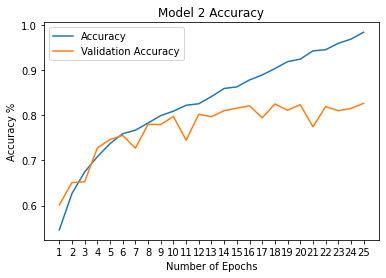

In [ ]:
num_epochs2 = []
for i in range(len(history_2.history['accuracy'])):
  num_epochs2.append(i+1)
plt.title("Model 2 Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy %")
plt.xticks(num_epochs2)
plt.plot(num_epochs2,history_2.history['accuracy'], label = "Accuracy")
plt.plot(num_epochs2, history_2.history['val_accuracy'], label = "Validation Accuracy")
plt.legend()
plt.savefig("Model_2_Accuracy", dpi=300)
plt.show()

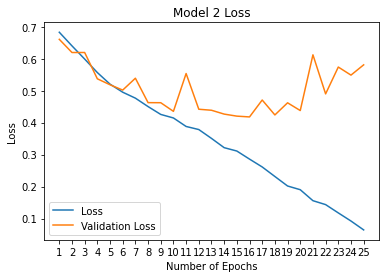

In [ ]:
plt.title("Model 2 Loss")
plt.xticks(num_epochs2)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(num_epochs2,history_2.history['loss'], label = "Loss")
plt.plot(num_epochs2, history_2.history['val_loss'], label = "Validation Loss")
plt.legend()
plt.savefig("Model_2_Loss", dpi=300)
plt.show()

In [ ]:
print(history_2.history.keys())
print(max(history_2.history['accuracy']))
print(max(history_2.history['val_accuracy']))
print(max(history_2.history['loss']))
print(max(history_2.history['val_loss']))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.9837601780891418
0.8264952898025513
0.6830153465270996
0.6608354449272156


In [ ]:
print(time_2_total/time_1_total)

3.548317869660371


Get Precision, Recall, and Accuracy of 
Model 2

In [ ]:
pred_2 = model_2.predict(x_test, batch_size=64)
predict_2 = np.argmax(pred_2, axis=1)
print(predict_2)
print(y_test_true)
report_2 = classification_report(y_test_true, predict_2, target_names=['Cat', 'Dog'])
print(report_2)

[0 1 0 ... 0 0 0]
[0 1 1 ... 0 0 0]
              precision    recall  f1-score   support

         Cat       0.81      0.85      0.83      1011
         Dog       0.84      0.81      0.82      1012

    accuracy                           0.83      2023
   macro avg       0.83      0.83      0.83      2023
weighted avg       0.83      0.83      0.83      2023

